<a href="https://colab.research.google.com/github/scomarae/SkillBox/blob/main/DS_Stat_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("/content/drive/MyDrive/SkillBox/bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [13]:
df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


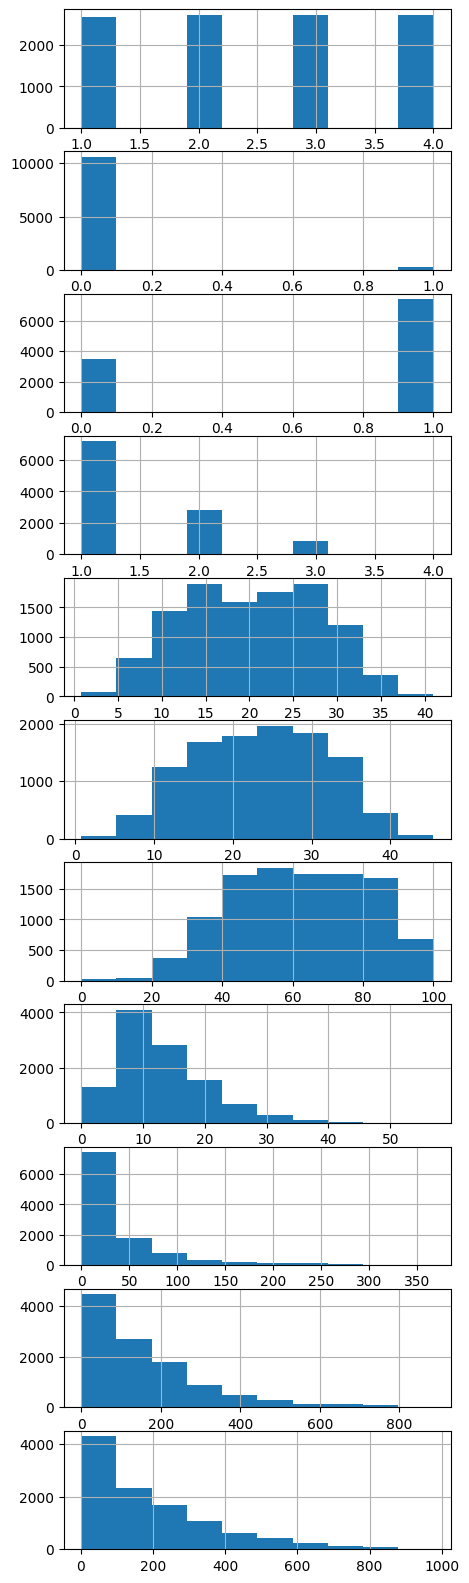

In [14]:
fig, axs = plt.subplots(len(df.columns), figsize=(5, 20))
for i, col in enumerate(df.columns):
  df[col].hist(ax=axs[i])

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [ ]:
### YOUR CODE HERE ###



### 3. (*)
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [ ]:
### YOUR CODE HERE ###



### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95.

In [ ]:
### YOUR CODE HERE ###



### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [ ]:
### YOUR CODE HERE ###



### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [ ]:
### YOUR CODE HERE ###

